## Unsupervised learning

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
url_2d = "/content/drive/MyDrive/data_1/data_2d.csv"
url_mnist = "/content/drive/MyDrive/data_1/mnist.csv"

df_2d = pd.read_csv(url_2d)

df_mnist = pd.read_csv(url_mnist)

### Analize the data

In [31]:
print("First 5 lines from 2d table")
df_2d.head()

First 5 lines from 2d table


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [32]:
print("First 5 lines from mnist table")
df_mnist.head()

First 5 lines from mnist table


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
missing_values = df_2d.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df_2d.shape[0]
print("\n",missing_values_proportion)

Missing values:
 0.000000000000000000e+00     0
-7.687164597386728637e-01    0
4.608603078297135447e-01     0
dtype: int64

 0.000000000000000000e+00     0.0
-7.687164597386728637e-01    0.0
4.608603078297135447e-01     0.0
dtype: float64


In [34]:
missing_values = df_mnist.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df_mnist.shape[0]
print("\n",missing_values_proportion)

Missing values:
 7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64

 7        0.0
0        0.0
0.1      0.0
0.2      0.0
0.3      0.0
        ... 
0.663    0.0
0.664    0.0
0.665    0.0
0.666    0.0
0.667    0.0
Length: 785, dtype: float64


In [35]:
col_types = df_2d.dtypes
print(col_types)

0.000000000000000000e+00     float64
-7.687164597386728637e-01    float64
4.608603078297135447e-01     float64
dtype: object


In [36]:
col_types = df_mnist.dtypes
print(col_types)

7        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.663    int64
0.664    int64
0.665    int64
0.666    int64
0.667    int64
Length: 785, dtype: object


In [37]:
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   0.000000000000000000e+00   199 non-null    float64
 1   -7.687164597386728637e-01  199 non-null    float64
 2   4.608603078297135447e-01   199 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [38]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 3.0 MB


In [39]:
df_2d.describe()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
count,199.000000,199.000000,199.000000
mean,0.502513,1.771587,2.220299
std,0.501255,1.230001,1.604383
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.880885,0.979439
50%,1.000000,1.736607,2.283748
75%,1.000000,2.707277,3.608612
max,1.000000,4.554605,5.722027


In [40]:
df_mnist.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,...,499.000000,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0
mean,4.372745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507014,0.256513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.874437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.325835,5.730067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Find K-means for df_2d

In [41]:
inertias = []

klaster_amount = range(1, 200)
for k in klaster_amount:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(df_2d)
    inertias.append(kmeans.inertia_)

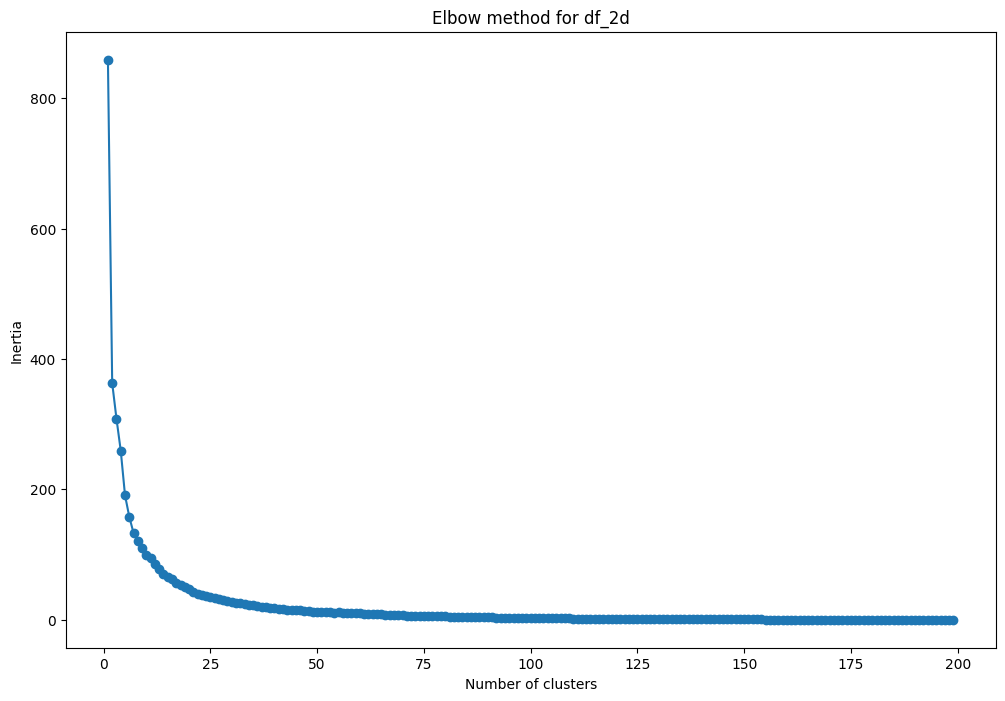

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(klaster_amount, inertias, marker='o')
plt.title('Elbow method for df_2d')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### We can notice that elbow was located near 6-9 clusters

In [43]:
inertias_second = []

klaster_amount_second = range(1, 20)
for k in klaster_amount_second:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(df_2d)
    inertias_second.append(kmeans.inertia_)

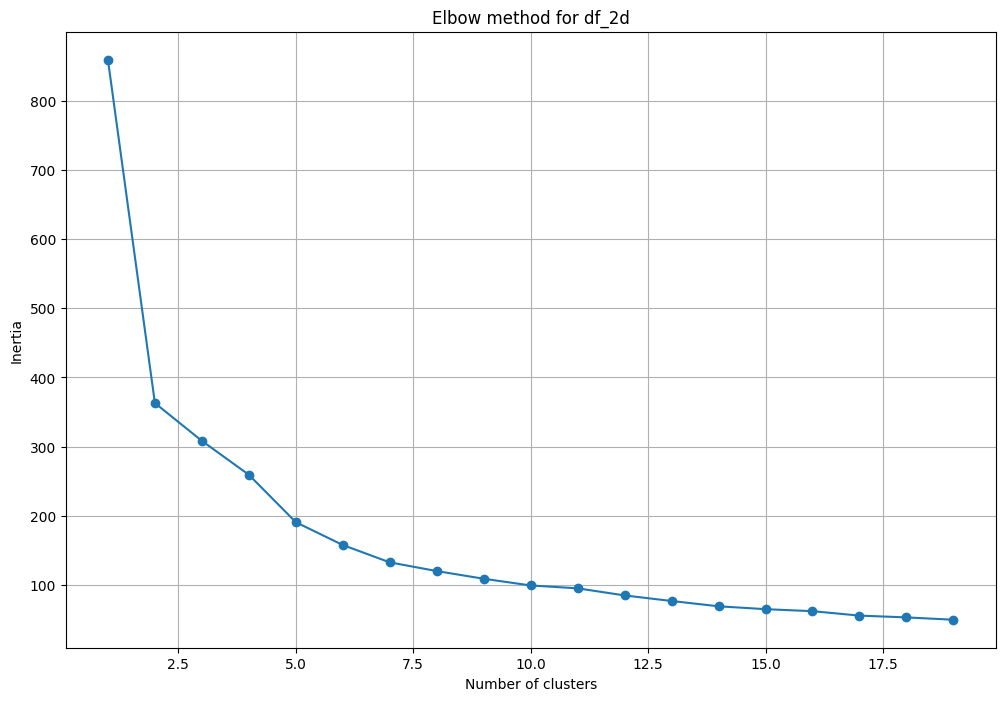

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(klaster_amount_second, inertias_second, marker='o')
plt.title('Elbow method for df_2d')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

#### PCA for df_mnist

In [45]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_mnist)

pca = PCA()
pca_result = pca.fit_transform(normalized_data)
explained_variance_ratio = pca.explained_variance_ratio_

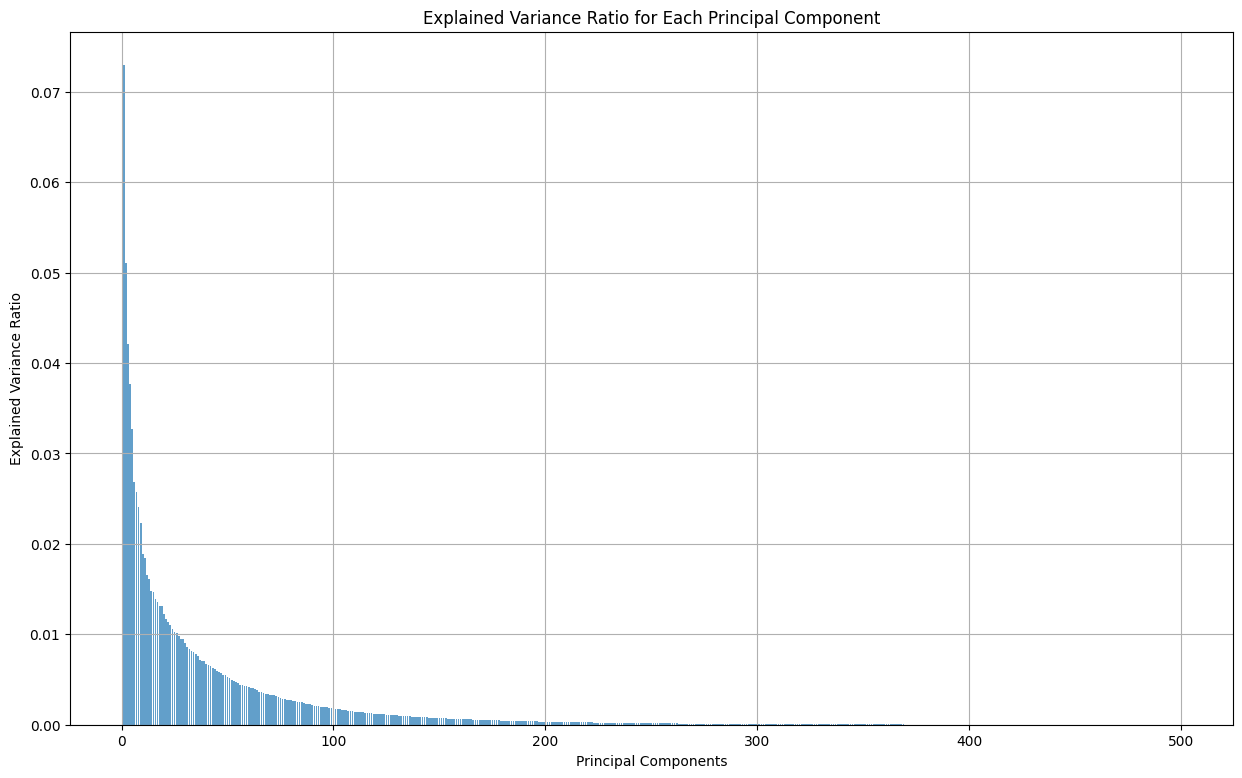

In [46]:
plt.figure(figsize=(15, 9))
plt.grid()
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

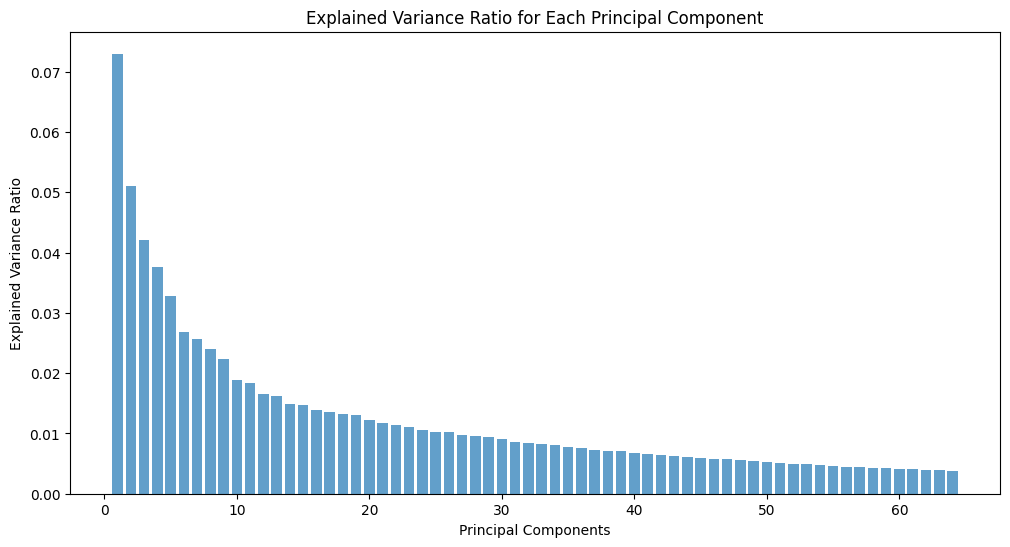

In [47]:
pca = PCA(n_components=0.8)

pca_result = pca.fit_transform(normalized_data)

num_components = pca.n_components_

plt.figure(figsize=(12, 6))
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()


In [48]:
print(f"The number of principal components that explain 80% of the variance: {num_components}")

The number of principal components that explain 80% of the variance: 64


#### Find optimal k for mnist (using elbow method)

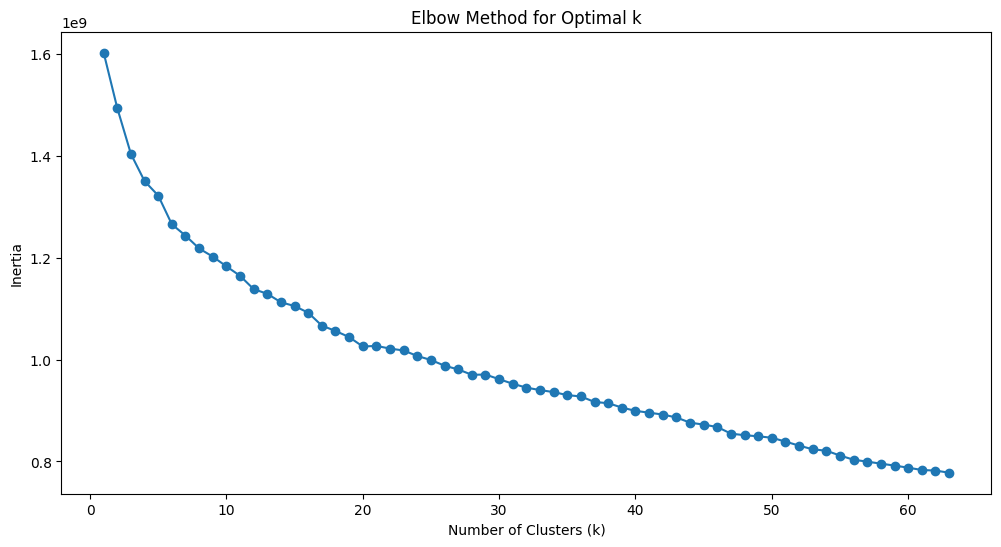

In [49]:
inertia_mnist = []

possible_k_values = range(1, num_components)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df_mnist)
    inertia_mnist.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(possible_k_values, inertia_mnist, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Diagram with optimal k for df_2d

Column's name: Index(['0.000000000000000000e+00', '-7.687164597386728637e-01',
       '4.608603078297135447e-01'],
      dtype='object')


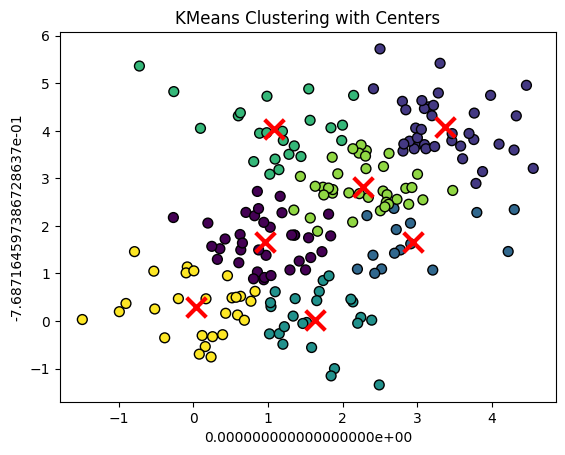

In [50]:
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, random_state=0, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(df_2d)

print("Column's name:", df_2d.columns)

plt.scatter(df_2d.iloc[:, 1], df_2d.iloc[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=200, linewidths=3)
plt.title('KMeans Clustering with Centers')
plt.xlabel(df_2d.columns[0])
plt.ylabel(df_2d.columns[1])
plt.show()

#### Visualize data for df_mnist

<ipython-input-51-8dad594c5b92>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result_mnist[:, 0], tsne_result_mnist[:, 1], marker='o', s=20, c='b', cmap='viridis', edgecolor='k')


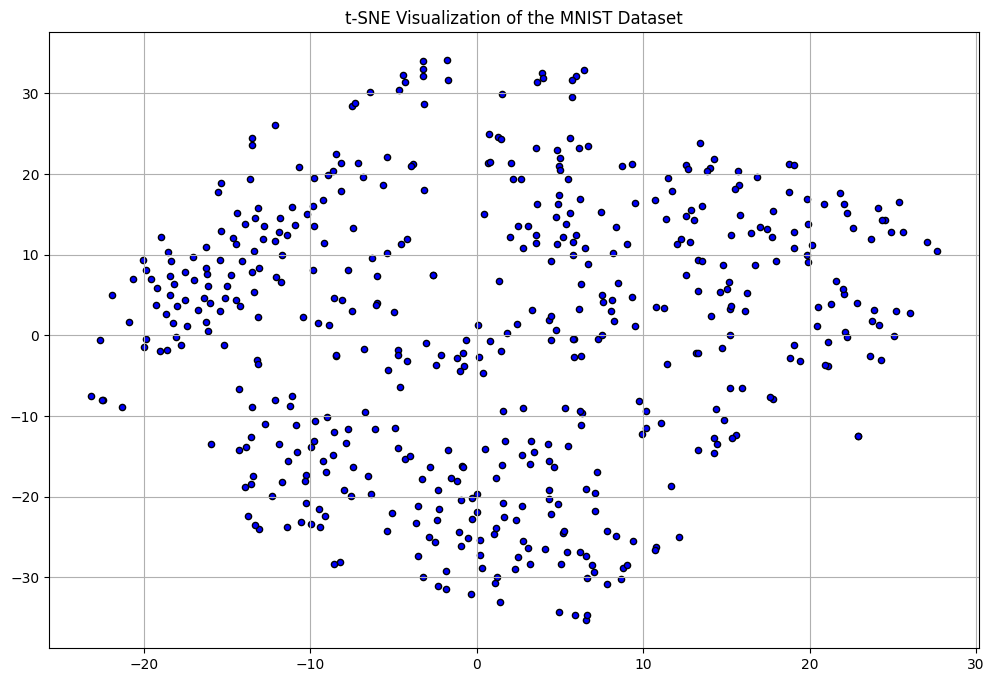

In [51]:
data_for_tsne_mnist = df_mnist.iloc[:, 0:]

pca_mnist = PCA(n_components=499)
pca_result_mnist = pca_mnist.fit_transform(data_for_tsne_mnist)

tsne_mnist = TSNE(n_components=2, random_state=0)
tsne_result_mnist = tsne_mnist.fit_transform(pca_result_mnist)

plt.figure(figsize=(12, 8))
plt.grid()
plt.scatter(tsne_result_mnist[:, 0], tsne_result_mnist[:, 1], marker='o', s=20, c='b', cmap='viridis', edgecolor='k')

plt.title('t-SNE Visualization of the MNIST Dataset')
plt.show()

#### Diagram with clasters - 2d

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


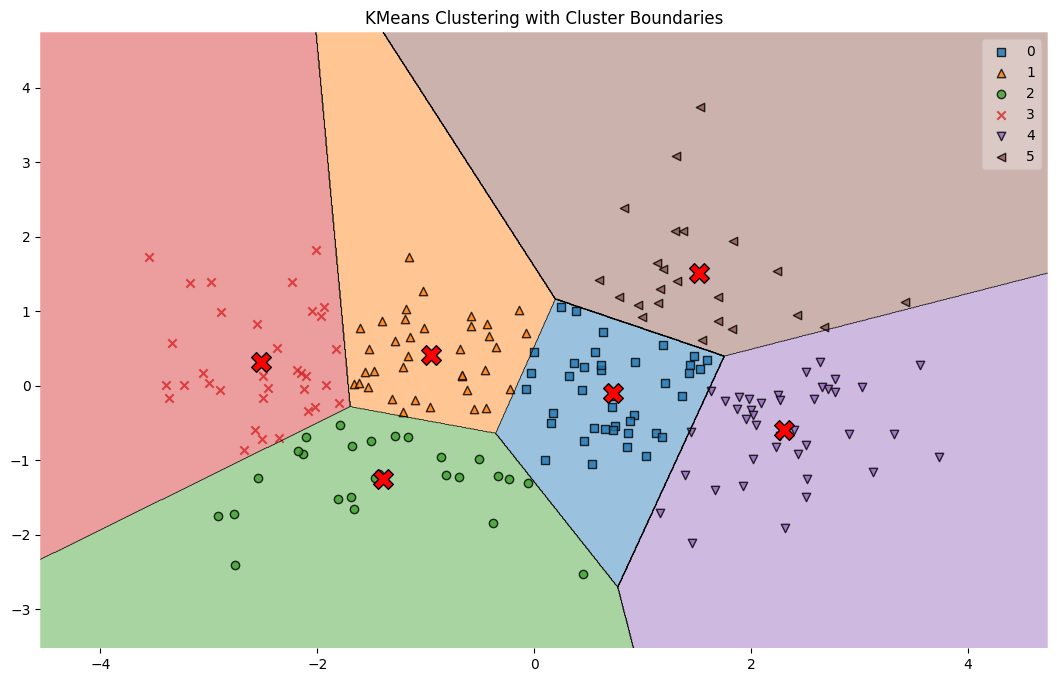

In [52]:
data_for_clustering_2d = df_2d

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering_2d)

kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans.fit(data_pca)

plt.figure(figsize=(13, 8))
plot_decision_regions(X=data_pca, y=kmeans.labels_, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers', edgecolor='black')
plt.title('KMeans Clustering with Cluster Boundaries')
plt.show()

#### Diagram with clasters - mnist

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


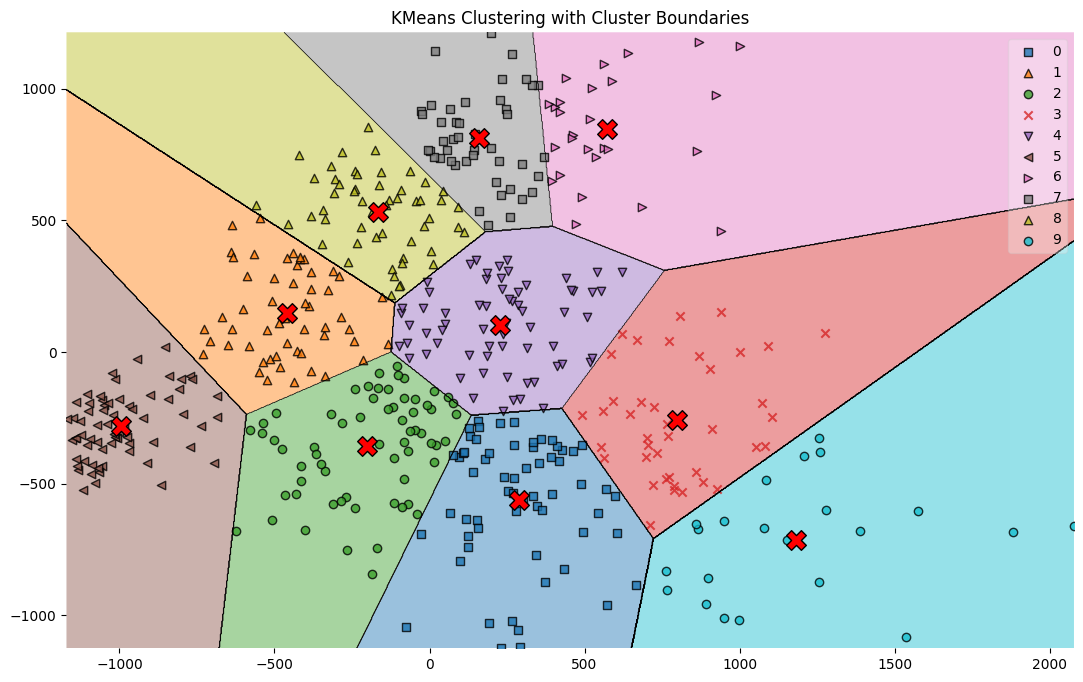

In [53]:
data_for_clustering_mnist = df_mnist

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering_mnist)

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(data_pca)

plt.figure(figsize=(13, 8))
plot_decision_regions(X=data_pca, y=kmeans.labels_, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers', edgecolor='black')
plt.title('KMeans Clustering with Cluster Boundaries')
plt.show()